In [1]:
import pandas as pd
import numpy as np
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Description
    - VIN (1-10): The first 10 characters of the vehicle’s VIN (Vehicle Identification Number).
    - County: The region where the vehicle’s owner is registered. Owners in Washington may have vehicles located in other states.
    - City: The city where the owner lives.
    - State: The state linked to the vehicle's registration.
    - Postal Code: The 5-digit ZIP code of the owner’s address.
    - Model Year: The year of the vehicle, decoded from the VIN.
    - Make: The manufacturer of the vehicle, decoded from the VIN.
    - Model: The vehicle’s model, decoded from the VIN.
    - Electric Vehicle Type: Whether the vehicle is fully electric or a plug-in hybrid.
    - CAFV Eligibility: Whether the vehicle qualifies as a Clean Alternative Fuel Vehicle (CAFV) based on Washington's 2019 House Bill 2042.
    - Electric Range: How far the vehicle can go on electric power alone.
    - Base MSRP: The lowest suggested retail price for the vehicle’s model.
    - Legislative District: The Washington state legislative area where the owner lives.
    - DOL Vehicle ID: A unique ID assigned by the Department of Licensing (DOL).
    - Vehicle Location: The center of the vehicle's registered ZIP code.
    - Electric Utility: The electric utility serving the owner’s address.
    - 2020 Census Tract: The census tract code (state + county + tract) assigned by the U.S. Census Bureau.

In [2]:
df =  pd.read_csv("dataset.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [3]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

## Data Cleaning

## Dropping the null values as they are less than 5% of missing values

In [4]:
df.isna().sum()/len(df)

VIN (1-10)                                           0.000000
County                                               0.000000
City                                                 0.000000
State                                                0.000000
Postal Code                                          0.000000
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000178
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.002539
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.000213
Electric Utility                                     0.003933
2020 Cen

In [5]:
df.dropna(inplace=True)

## dropping the unwanted columns as they are contain values which are all unique and doesn't give any useful information for analysis

In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.shape

(112152, 17)

In [8]:
df.nunique()

VIN (1-10)                                             7522
County                                                   39
City                                                    435
State                                                     1
Postal Code                                             516
Model Year                                               20
Make                                                     34
Model                                                   114
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          101
Base MSRP                                                30
Legislative District                                     49
DOL Vehicle ID                                       112152
Vehicle Location                                        516
Electric Utility                                         73
2020 Census Tract                       

In [9]:
import re

def xed(x):
    k,j = re.findall("\s.*",x)[0].strip(" (").strip(")").split(" ")
    return (float(k),float(j))

In [10]:
xed(df["Vehicle Location"][2])

(-120.50721, 46.60448)

In [11]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [12]:
df["coordinates"] = df["Vehicle Location"].apply(lambda x: xed(x))

In [13]:
df.drop(columns=['DOL Vehicle ID','Vehicle Location'],inplace=True)

# EDA

## Univariate

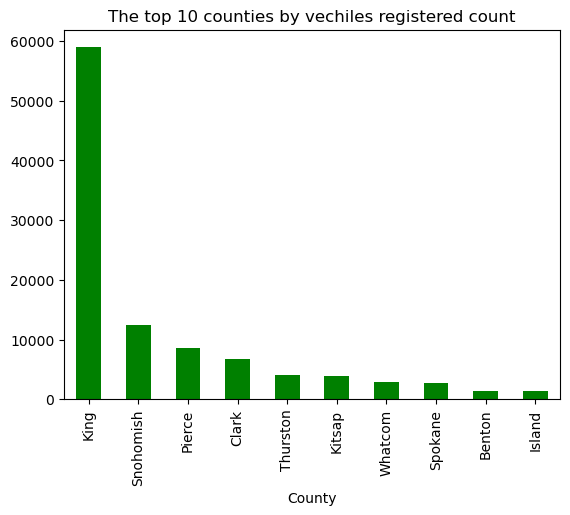

In [14]:
df["County"].value_counts().head(10).plot(kind="bar",color="green")
plt.title("The top 10 counties by vechiles registered count")
plt.show()

## > From the above we can see the top 10 counties where majority of people are using electronic vehicles as a transport means. The `King` county has the largest no.of vehicles registered.

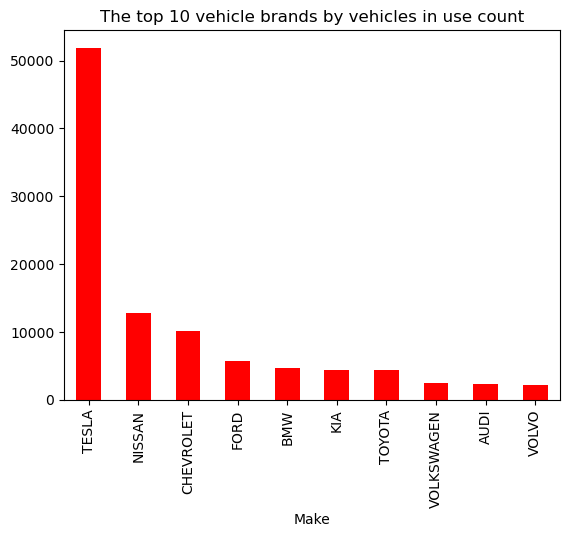

In [15]:
df["Make"].value_counts().head(10).plot(kind="bar",color="red")
plt.title("The top 10 vehicle brands by vehicles in use count")
plt.show()

In [16]:
df["Make"].value_counts(ascending=True).head()

Make
TH!NK              3
BENTLEY            3
AZURE DYNAMICS     7
GENESIS           18
FISKER            19
Name: count, dtype: int64

## > From the above we can observe that `Tesla` is dominating the electric vehicles industry with such a huge customer base, while some brands like `THINK` & `BENTLY` have such a low presence in the market.

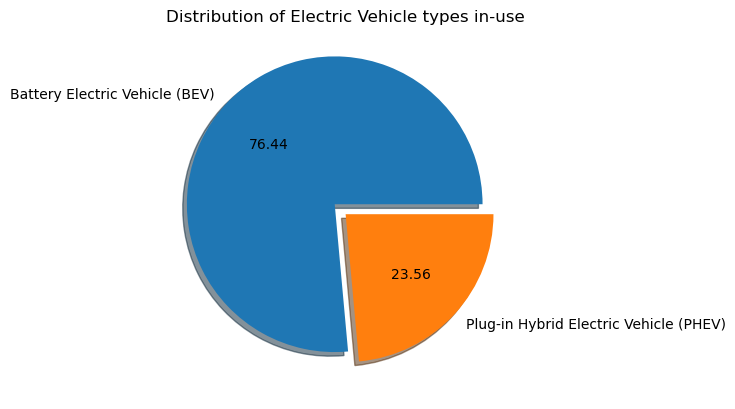

In [17]:
df["Electric Vehicle Type"].value_counts().plot(kind="pie",color="yellow",autopct="%.2f",shadow=True,explode=[0.1,0])
plt.title("Distribution of Electric Vehicle types in-use")
plt.ylabel("")
plt.show()

## > From the above we can observe that `Battery` based Electric Vehicles are more in use than `Plug-in Hybrid` based Electric Vehicles.

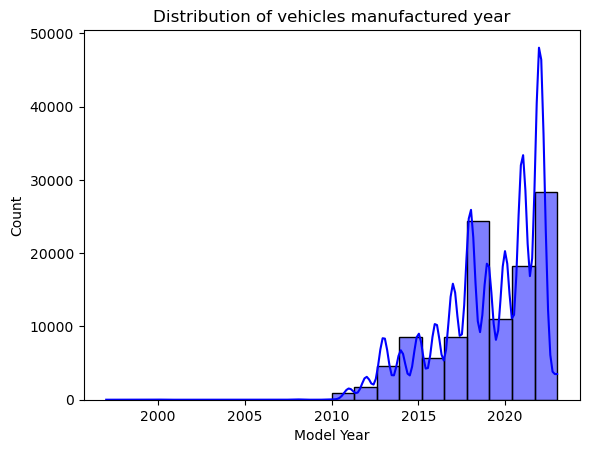

In [18]:
sns.histplot(df["Model Year"],kde=True,color="blue",bins=20)
plt.title("Distribution of vehicles manufactured year")
plt.show()

## > From the above we can observe that majority of the people are using vehicles that were manufactured in the years: 2021 - 2022

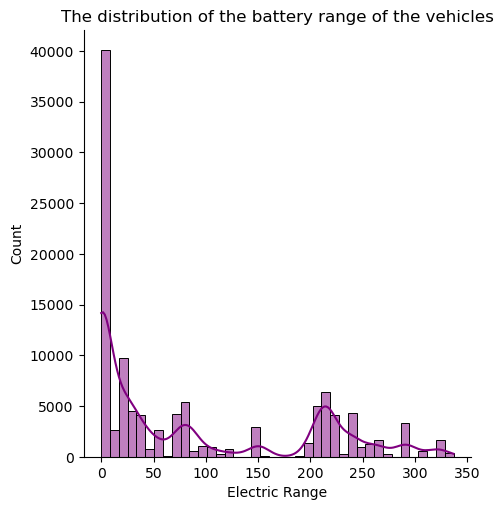

In [19]:
sns.displot(df["Electric Range"],kde=True,color="purple")
plt.title("The distribution of the battery range of the vehicles")
plt.show()

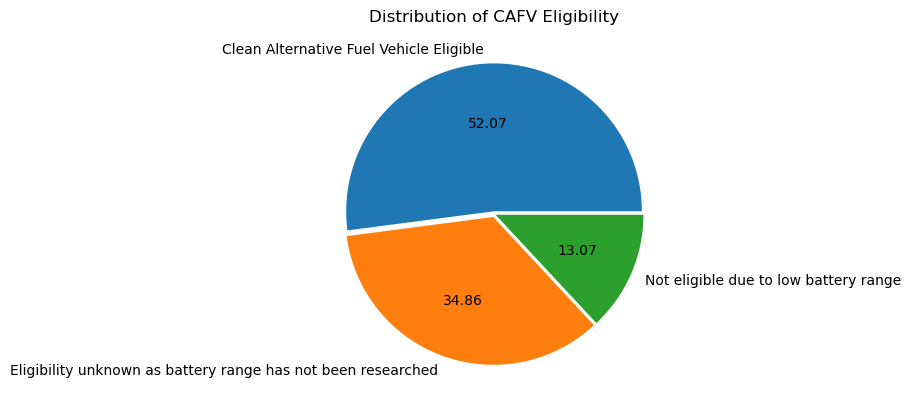

In [20]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind="pie",autopct="%.2f",explode=[0.02,0.02,0.01])
plt.title("Distribution of CAFV Eligibility")
plt.ylabel("")
plt.show()

In [21]:
df.groupby("Clean Alternative Fuel Vehicle (CAFV) Eligibility")["Electric Range"].agg(["min","max","mean","count"])

,min,max,mean,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,,,,
Clean Alternative Fuel Vehicle Eligible,30,337,163.822194,58395
Eligibility unknown as battery range has not been researched,0,0,0.000000,39097
Not eligible due to low battery range,6,29,19.363847,14660


## > From the above, we can observe that around 48% of the cars have a battery range 0-30 which might be due to some vehicles not having the eligibility due to low battery percentage and others not having their battery range researched. The reason for that can be because of the vehicle being an old model which were manufactured before the electric vehicles era.

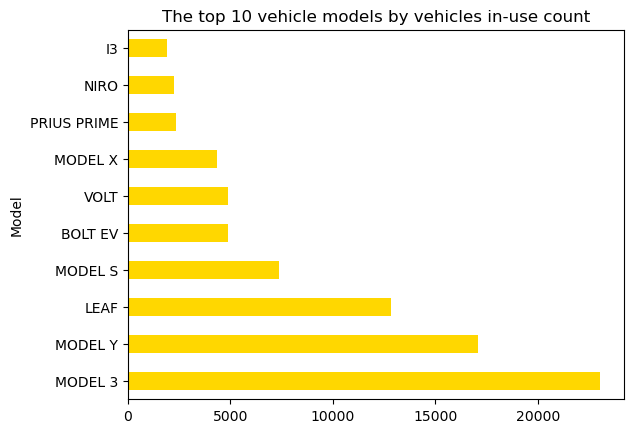

In [22]:
df["Model"].value_counts().head(10).plot(kind="barh",color="gold")
plt.title("The top 10 vehicle models by vehicles in-use count")
plt.show()

## > From the above we can observe that `MODEL 3`, `MODEL Y` and `LEAF` are the models with highest demand in the market

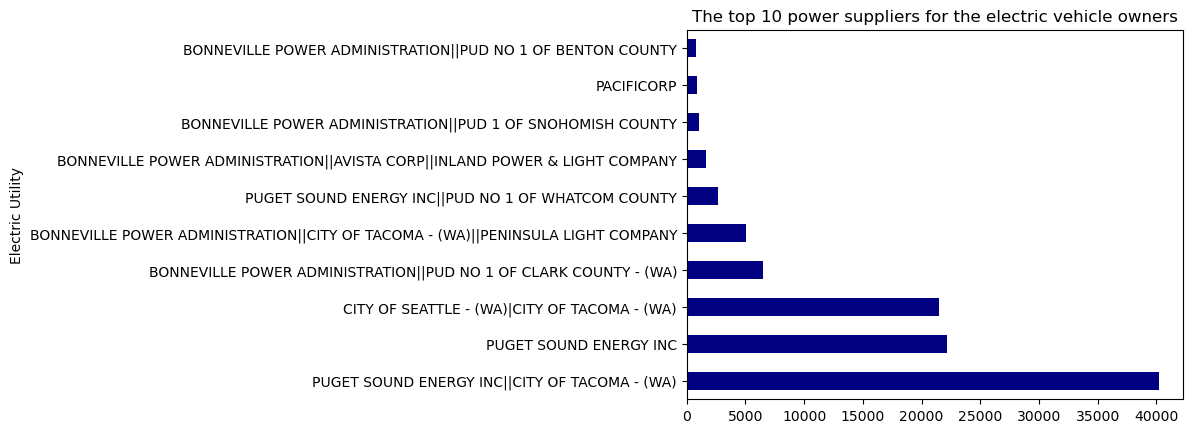

In [34]:
df["Electric Utility"].value_counts().head(10).plot(kind="barh",color="navy")
plt.title("The top 10 power suppliers for the electric vehicle owners")
plt.show()

## > From the above we can observe the top 10 electric power providers respective to the customers locations and usage.

In [24]:
temp = df[df["Base MSRP"]!=0] # removing the values 0 as the vehicles can't be sold for free. Considering that their values might be missing

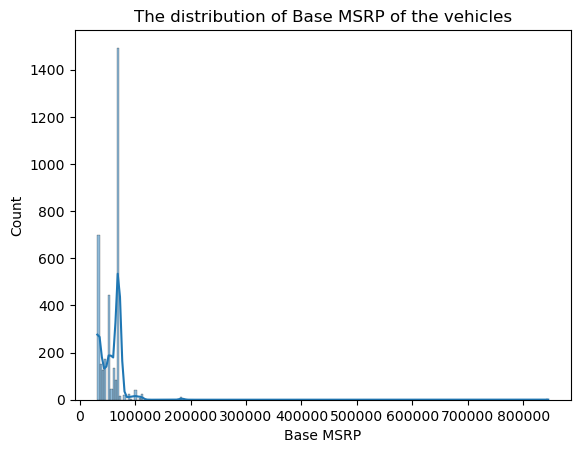

In [25]:
sns.histplot(data=temp,x="Base MSRP",kde=True)
plt.title("The distribution of Base MSRP of the vehicles")
plt.show()

## > From the above we can say that most of the vehicles have an `Base MSRP` of ranging between 0 to 100,000.

 ----

## Bivariate 

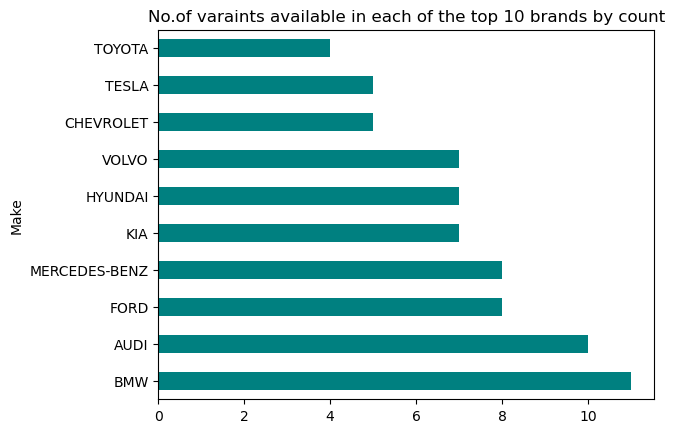

In [26]:
df.groupby("Make")["Model"].nunique().sort_values(ascending=False).head(10).plot(kind="barh",color="teal")
plt.title("No.of varaints available in each of the top 10 brands by count")
plt.show()

## > From the above we can observe the top 10 brands which have a large range of variants available/being used in the market.

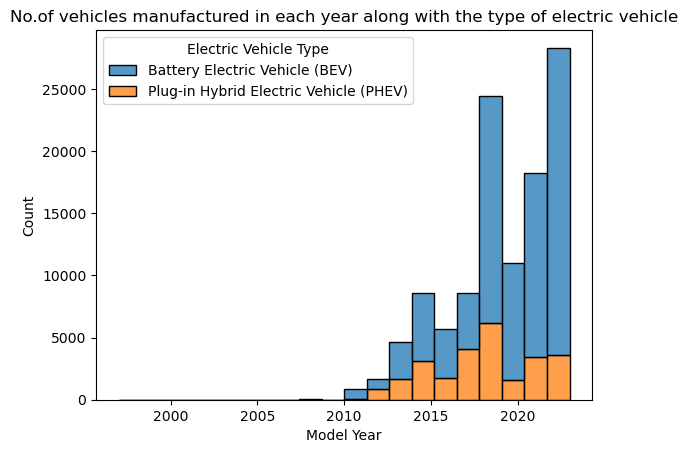

In [27]:
sns.histplot(data=df,x="Model Year",hue="Electric Vehicle Type",bins=20, multiple='stack')
plt.title("No.of vehicles manufactured in each year along with the type of electric vehicle")
plt.show()

## > From the above plot we can observe that there was a cut in the  manufacturing of vehicles in the year 2020 which might be due to the covid pandemic post which the production rose back up. The vehicles industry had a bloom in the `2019` and again in `2023`.

<Axes: xlabel='Model'>

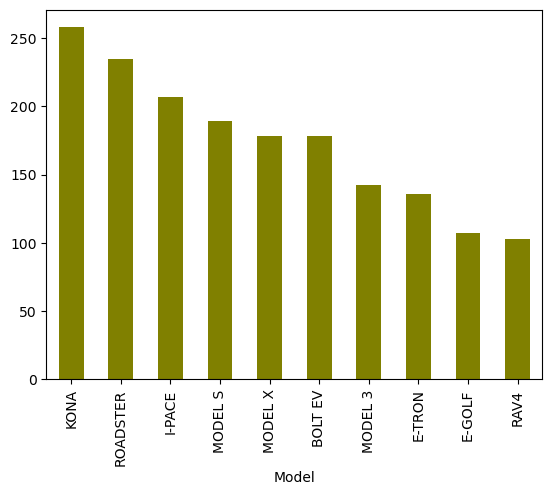

In [28]:
df.groupby("Model")["Electric Range"].mean().sort_values(ascending=False).head(10).plot(kind="bar",color="olive")

## > From the above we can observe the top 10 vehicle models with a high average electric range. 

In [29]:
temp = df[df["Electric Range"]!=0] # removing the values 0 as the battery based vehicles can't be having 0 Range. Assuming that their values might be missing.

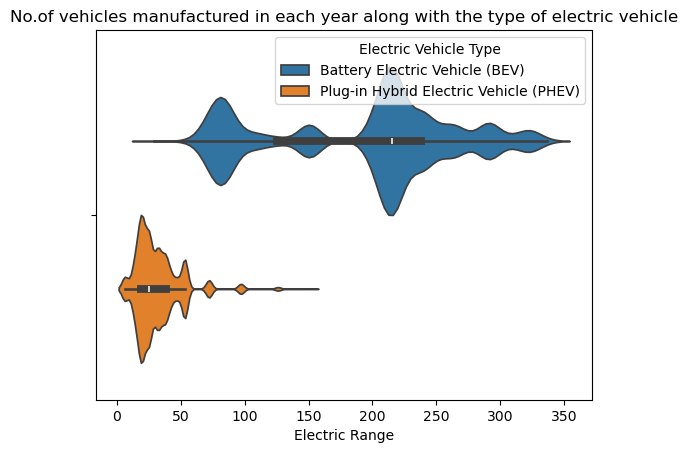

In [30]:
sns.violinplot(data=temp,x="Electric Range",hue="Electric Vehicle Type")
plt.title("No.of vehicles manufactured in each year along with the type of electric vehicle")
plt.show()

## > From the above we can see that the `plug-in` type vehicles mostly have a range of 0-50, while the `battery` type vehicles has a wide distribution from 170 to 300.

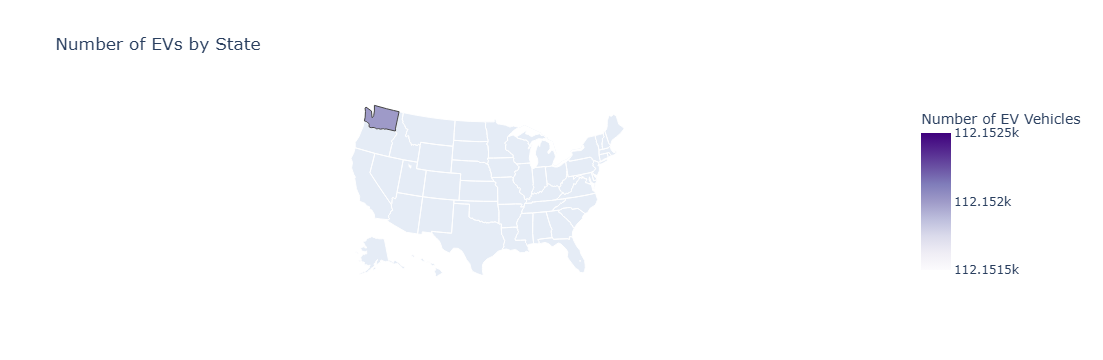

In [35]:
import plotly.express as px
state_data = df.groupby('State')['VIN (1-10)'].count().reset_index()
state_data.columns =['State','EV Count']

fig = px.choropleth(state_data,
                   locations ='State',
                   locationmode='USA-states',
                   color='EV Count',
                   color_continuous_scale='Purples',
                   scope='usa',
                   labels={'EV Count':'Number of EV Vehicles'},
                   title='Number of EVs by State')
fig.show()

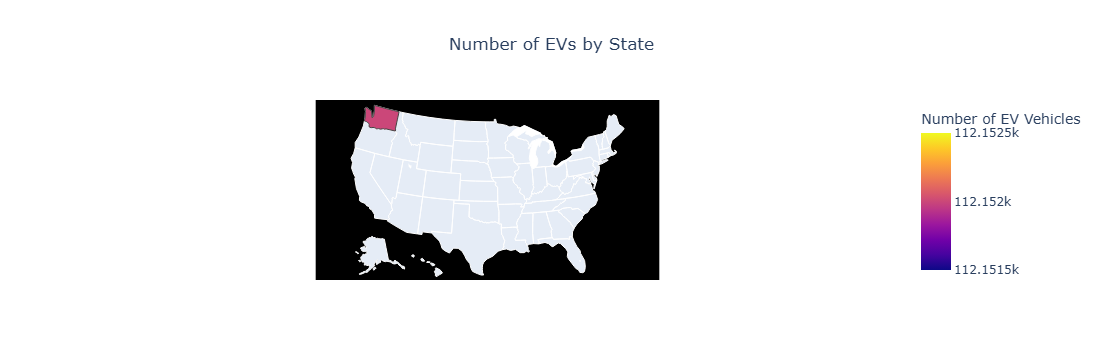

In [36]:
import plotly.express as px
count_by_state = df.groupby("State").size().reset_index(name='count')
fig = px.choropleth(count_by_state,
                   locations ='State',
                   locationmode='USA-states',
                   color='count',
                   scope='usa',
                   labels={'count':'Number of EV Vehicles'},
                   title='Number of EVs by State')

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,255)'),
                 title_x=0.5)
fig.show()

In [32]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility',
       '2020 Census Tract', 'coordinates'],
      dtype='object')

In [33]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract,coordinates
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,PACIFICORP,53077001602,"(-120.50721, 46.60448)"
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,PUGET SOUND ENERGY INC,53057951101,"(-121.7515, 48.53892)"
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,PUGET SOUND ENERGY INC,53061041500,"(-122.20596, 47.97659)"
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,PUGET SOUND ENERGY INC,53061051916,"(-122.18384, 47.8031)"
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,PUGET SOUND ENERGY INC,53061040900,"(-122.23019, 47.94949)"
